<H1>Hướng dẫn chung

<h3>Import các thư viện cần thiết

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


<h3>1.	Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện (tương ứng với file adult.data.csv) và số lượng dữ liệu kiểm thử (tương ứng với file adult.test.csv)

In [22]:
train = pd.read_csv('E:/IS252/Lab4/adult.data.csv')
test = pd.read_csv('E:/IS252/Lab4/adult.test.csv')

<h3>2.	Tiến hành tiền xử lý dữ liệu:

<li>Xóa những dòng có chứa dữ liệu trống, biết rằng dữ liệu trống được ký hiệu bằng dấu ‘?’.

In [23]:
train.replace(' ?',np.nan,inplace=True)

In [24]:
train=train.dropna()

In [25]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
test.replace(' ?',np.nan,inplace=True)

In [27]:
test=test.dropna()
test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


<li>Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện vì cột này không có trong dữ liệu kiểm thử.

In [28]:
del train["fnlwgt"]

<li>Nối dữ liệu huấn luyện và kiểm thử lại với nhau để phục vụ các bước tiếp theo.

In [29]:
df=pd.concat([train,test])

In [30]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [31]:
print('Number of training data:',len(train))
print('Number of test data:', len(test))

Number of training data: 30162
Number of test data: 15060


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


<h3>3.	Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.

<p>Kết hợp với thư viện biểu diễn đồ thị seaborn để trực quan hóa kết quả bằng đồ thị
heatmap.


<AxesSubplot:>

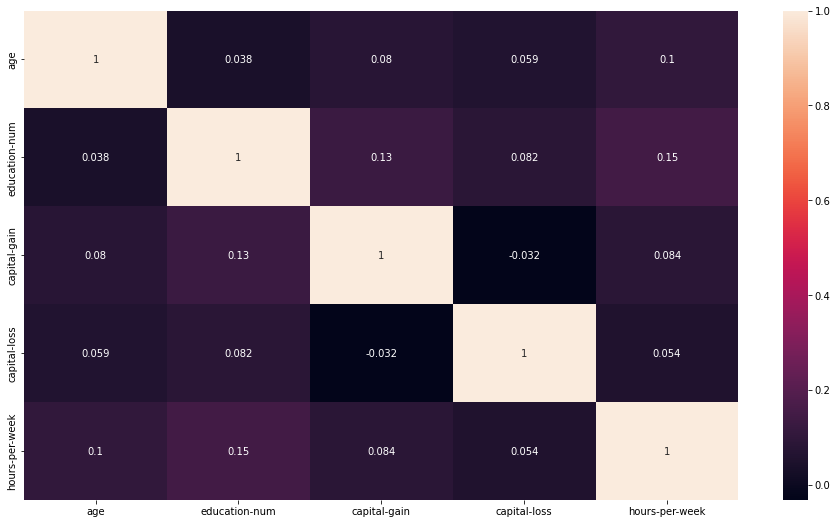

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

<p>Trong đồ thị này, màu càng đậm chứng tỏ mức độ tương đồng càng thấp.
<p>Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết phải loại bỏ cột nào.


<h3>4.	Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘Income’) bằng câu lệnh sau.

In [34]:
feature = df.drop('income',axis=1)
label = df['income']

<p>Với data là DataFrame chứa toàn bộ dữ liệu Adult Income đã gộp lại ở yêu cầu tiền xử lý.

<h3>5.	Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

<p>Xác định các thuộc tính không phải dạng số trong biến features bằng câu lệnh sau.

In [35]:
feature.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

<p>Kết hợp câu lệnh get_dummies của thư viện pandas để chuyển đổi các cột này về dạng one-hot vector

In [36]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16276,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<h3>6.	Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [37]:
x_train = feature_onehot[:30162]
x_test = feature_onehot[30162:]
y_train=label[:30162]
y_test=label[30162:]

<h3>7.	Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

<p>Để xây dựng cây ID3, sinh viên thực hiện câu lệnh sau.

In [38]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<p>Với biến criterion=’entropy’ để yêu cầu thư viện thực hiện phân nhánh theo information gain. Sinh viên có thể tham khảo thêm các cài đặt ở tài liệu của thư viện sklearn.

<p>Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử. Thư viện này cũng sẽ hỗ trợ việc tính toán các thông tin như độ chính xác, độ phủ của mô hình đã xây dựng

In [39]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



<p>Tính toán ma trận nhầm lẫn

In [40]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

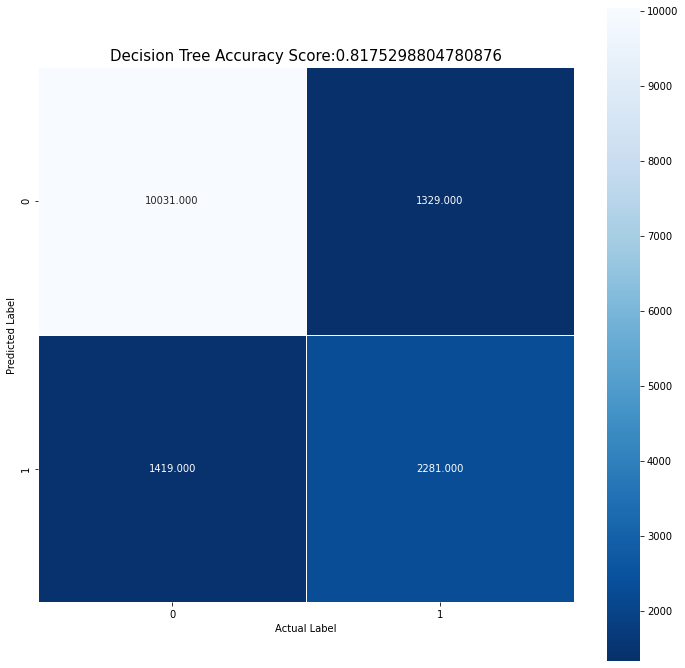

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

<p>Biểu diễn cây ID3 bằng câu lệnh.

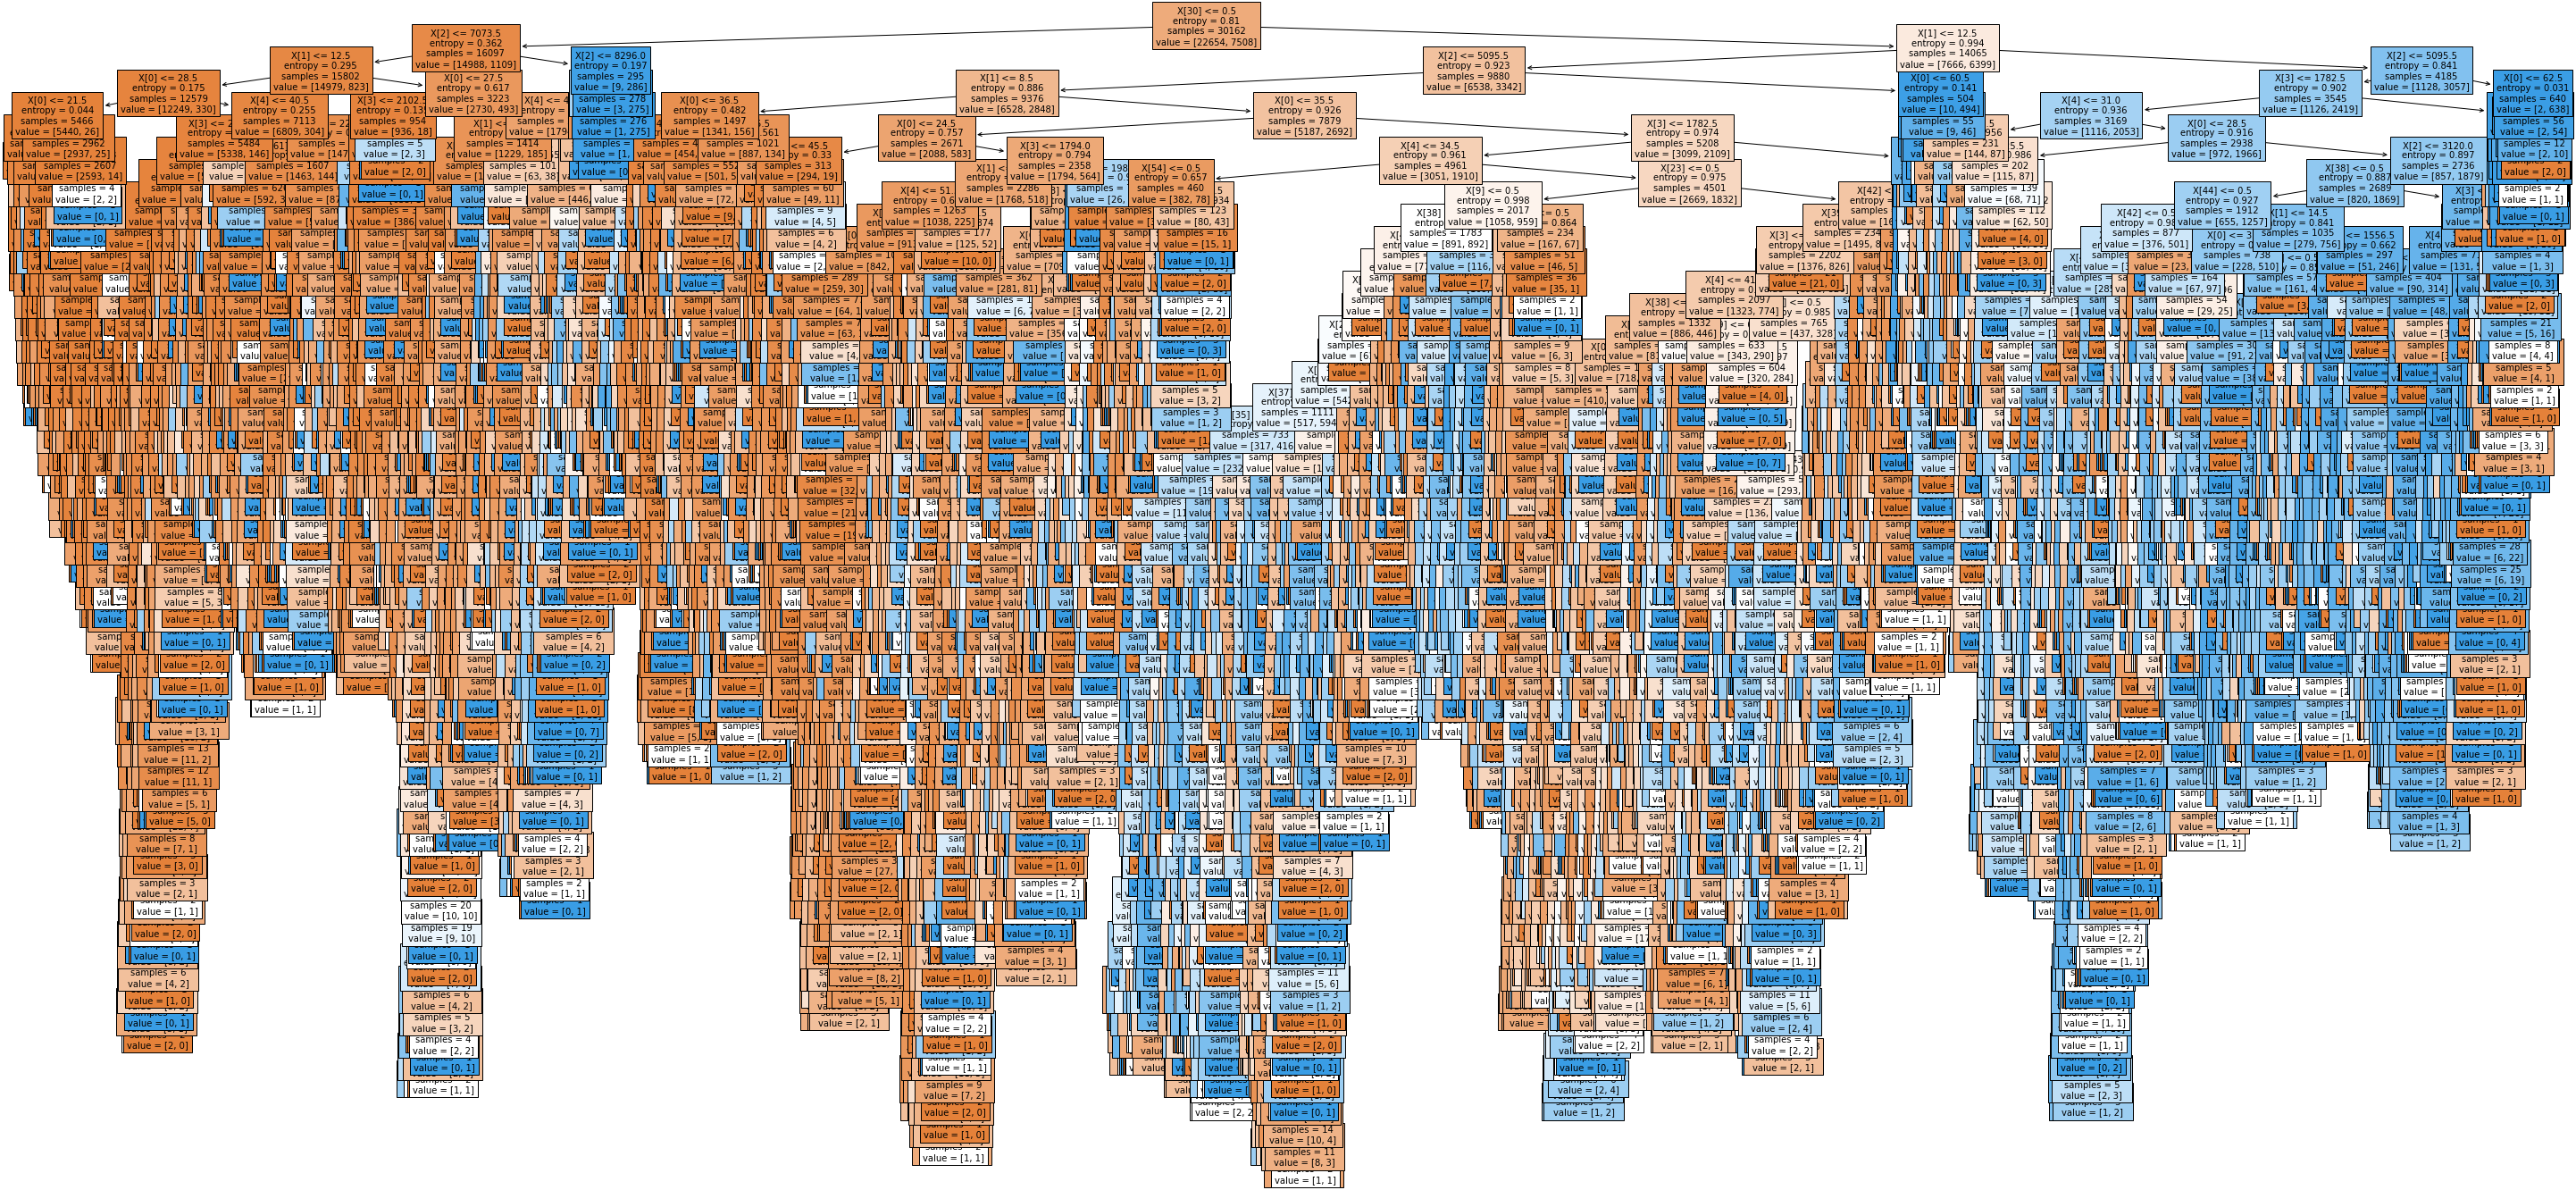

In [42]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<p>Câu lệnh savefig với dpi=100 giúp lưu lại cây vào file ‘decision_tree.png’ với chất
lượng tốt.

<h3>8.	Lặp lại yêu cầu 7 đối với cây CART.

In [43]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
tree_pred = clf2.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.8122841965471448
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



<p>Tính toán ma trận nhầm lẫn

In [45]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

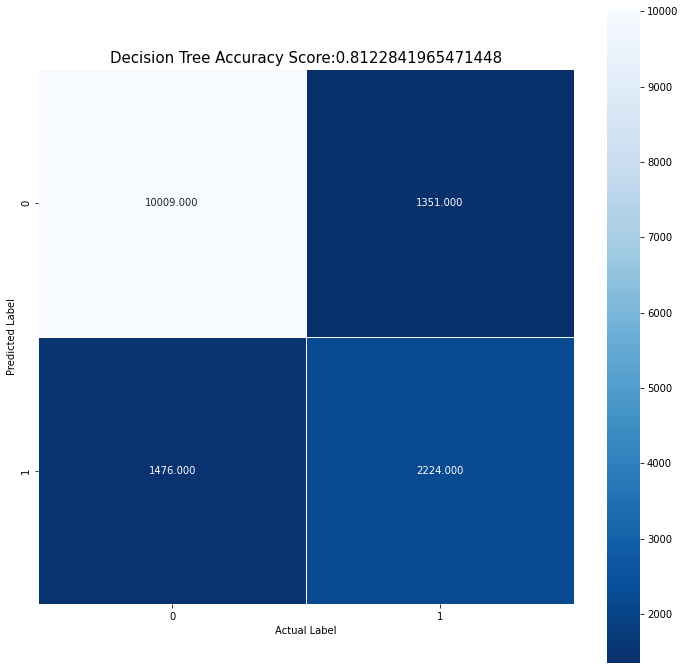

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

<h3>9.	Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được.

<p>Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh sau

In [47]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train,y_train).predict(x_test)


<p>Và biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap.

In [48]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accruracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Accruracy: 0.8029216467463479
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



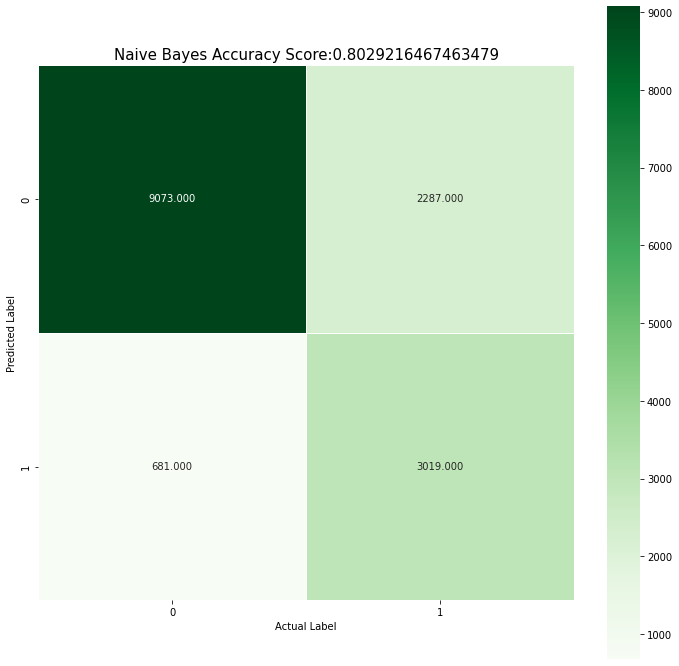

In [49]:
#Tính toán ma trận nhầm lẫn
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Naive Bayes Accuracy Score:{0}'.format(bayes_score)
plt.title(title,size=15);

<h3>10.	So sánh kết quả của các mô hình trên.

<p>Dựa vào mô hình ta có độ chính xác của :
<li>Thuật toán cây ID3 cao nhất (0.8175298804780876)
<li>Thuật toán Naive Bayes là thấp nhất (0.8029216467463479)
<p>Vậy đối với mô hình này sử dụng thuật toán cây quyết định ID3 là tốt nhất